In [13]:
!pip install scikit-learn

In [21]:
import sklearn
print(sklearn.__version__)

1.6.1


In [19]:
import sys
print(sys.executable)

C:\Users\Carlos\AppData\Local\Programs\Python\Python310\python.exe


In [20]:
import sys
!{sys.executable} -m pip install scikit-learn

You should consider upgrading via the 'C:\Users\Carlos\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import os

dataset_path = "dataset"

for categoria in ["piezas_buenas", "piezas_malas"]:
    ruta = os.path.join(dataset_path, categoria)
    archivos = os.listdir(ruta)
    print(f"{categoria}: {len(archivos)} imágenes")

piezas_buenas: 245 imágenes
piezas_malas: 92 imágenes


In [2]:
import os

import cv2
import numpy as np

# Ruta a la carpeta dataset
DATASET_PATH = "dataset"
IMG_SIZE = 128

# Etiquetas: piezas buenas = 0, piezas malas = 1
CATEGORIES = ["piezas_buenas", "piezas_malas"]

data = []

# Recorremos ambas categorías
for label, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATASET_PATH, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            # Leer la imagen en escala de grise(hemos cambiado a color porque tenemos fallos por manchas, quemaduras etc)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            # 🎨 Convertir de BGR a RGB (OpenCV usa BGR por defecto)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Redimensionar a 128x128
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            # Normalizar valores (de 0-255 a 0-1)
            img = img / 255.0
            # Añadir a la lista de datos junto con su etiqueta (0 o 1)
            data.append([img, label])
        except Exception as e:
            print(f"⚠️ Error al procesar {img_path}: {e}")

# Mezclar los datos aleatoriamente
import random
random.shuffle(data)

# Separar datos y etiquetas
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convertir a arrays de numpy(3 es el numero de canales de color, si fuera escala de grises habria que poner 1)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

print("✅ Imágenes preprocesadas correctamente")
print("🔢 Tamaño de X:", X.shape)
print("🔢 Tamaño de y:", y.shape)

✅ Imágenes preprocesadas correctamente
🔢 Tamaño de X: (337, 128, 128, 3)
🔢 Tamaño de y: (337,)


✅ Datos divididos:
📊 X_train: (269, 128, 128, 3)
📊 X_val: (68, 128, 128, 3)


C:\Users\Carlos\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - accuracy: 0.7109 - loss: 8.5717 - val_accuracy: 0.2794 - val_loss: 8.0985
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.8781 - loss: 0.2781 - val_accuracy: 0.2794 - val_loss: 13.3504
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.9326 - loss: 0.1850 - val_accuracy: 0.7647 - val_loss: 1.0855
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.9365 - loss: 0.2924 - val_accuracy: 0.7206 - val_loss: 5.3022
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.9751 - loss: 0.0954 - val_accuracy: 0.7206 - val_loss: 13.2021
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.9515 - loss: 0.1371 - val_accuracy: 0.7206 - val_loss: 19.8244
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step - accuracy: 0.9672 - loss: 0.1674 - val_accuracy: 0.7206 - val_loss: 27.4596
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.9250 - loss: 0.3445 - val_accurac

C:\Users\Carlos\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - accuracy: 0.8153 - loss: 10.9009 - val_accuracy: 0.7206 - val_loss: 84.4032
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.9739 - loss: 0.2346 - val_accuracy: 0.7206 - val_loss: 84.7069
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.9833 - loss: 0.0840 - val_accuracy: 0.6765 - val_loss: 11.8469
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 437ms/step - accuracy: 0.9187 - loss: 0.2584 - val_accuracy: 0.8971 - val_loss: 4.1781
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 446ms/step - accuracy: 0.8754 - loss: 0.1351 - val_accuracy: 0.2794 - val_loss: 36.4857
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.9828 - loss: 0.1056 - val_accuracy: 0.2794 - val_loss: 43.0038
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.9862 - loss: 0.1117 - val_accuracy: 0.7206 - val_loss: 35.9381
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step - accuracy: 0.9911 - loss: 0.0625 - val_accur

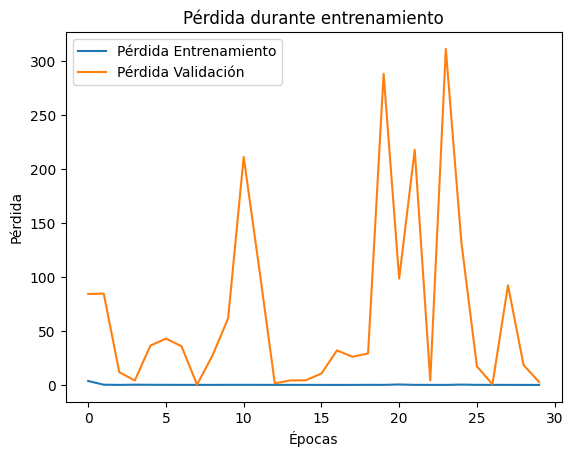

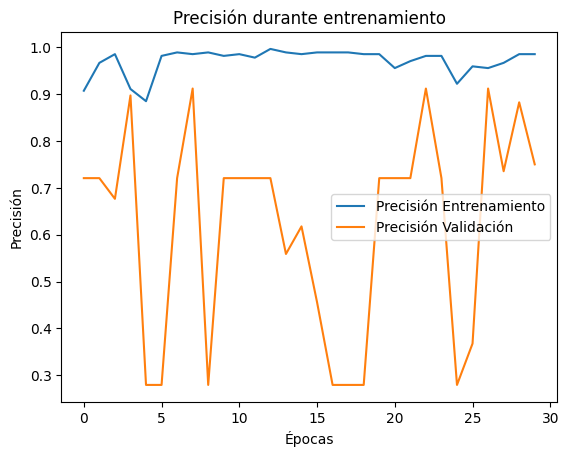

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1️⃣ Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos divididos:")
print("📊 X_train:", X_train.shape)
print("📊 X_val:", X_val.shape)

# 2️⃣ Crear el modelo CNN

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.4),  # Subimos un poco para evitar sobreajuste
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])




# 3️⃣ Compilar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4️⃣ Entrenar
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_val, y_val))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    epochs=30,
    validation_data=(X_val, y_val)
)



# 5️⃣ Graficar resultados
#perdida
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title("Pérdida durante entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.show()

#6 precision
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
# muestra que porcentaje de imagenes clasifico correctamente
# si la precision se mantiene alta en validación -> el modelo se generaliza bien


plt.title("Precisión durante entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [47]:
model.save("mi_modelo.keras")

In [1]:
import os

# Ruta donde están tus imágenes
ruta =  "C:\\Users\\Carlos\\Desktop\\leather\\test\\poke"  # 👈 cambia esto si es necesario

# Listar los archivos PNG en orden
imagenes = sorted([f for f in os.listdir(ruta) if f.endswith(".png")])

# Desde qué número quieres empezar
contador = 74

for nombre in imagenes:
    nueva_ruta = os.path.join(ruta, f"{contador:03}.png")  # 3 dígitos: 019.png, 020.png, ...
    ruta_original = os.path.join(ruta, nombre)
    
    os.rename(ruta_original, nueva_ruta)
    print(f"✅ Renombrado: {nombre} → {contador:03}.png")
    
    contador += 1

✅ Renombrado: 000.png → 074.png
✅ Renombrado: 001.png → 075.png
✅ Renombrado: 002.png → 076.png
✅ Renombrado: 003.png → 077.png
✅ Renombrado: 004.png → 078.png
✅ Renombrado: 005.png → 079.png
✅ Renombrado: 006.png → 080.png
✅ Renombrado: 007.png → 081.png
✅ Renombrado: 008.png → 082.png
✅ Renombrado: 009.png → 083.png
✅ Renombrado: 010.png → 084.png
✅ Renombrado: 011.png → 085.png
✅ Renombrado: 012.png → 086.png
✅ Renombrado: 013.png → 087.png
✅ Renombrado: 014.png → 088.png
✅ Renombrado: 015.png → 089.png
✅ Renombrado: 016.png → 090.png
✅ Renombrado: 017.png → 091.png
